In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [41]:
df=pd.read_csv("C:\\Users\\User\\Desktop\\Machine Learning\\Pandas\\Datasets\\fraud detection.csv")
print("\nFirst 4 Rows of the Dataset:")
df.head(4) 


First 4 Rows of the Dataset:


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0


In [77]:
df.shape

(6362620, 11)

In [79]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [81]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [83]:
df[df.columns].nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [84]:
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [85]:
df.describe().round(3)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.000,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6362620.000,6362620.000
mean,243.397,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,0.001,0.000
std,142.332,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,0.036,0.002
min,1.000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000,0.000
25%,156.000,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000,0.000
50%,239.000,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000,0.000
75%,335.000,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000,0.000
max,743.000,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000,1.000


In [87]:
df.describe(include = 'object').round(3)

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1902386530,C1286084959
freq,2237500,3,113


In [88]:
df.describe(include = 'int64').round(3)

,step,isFraud,isFlaggedFraud
count,6362620.000,6362620.000,6362620.000
mean,243.397,0.001,0.000
std,142.332,0.036,0.002
min,1.000,0.000,0.000
25%,156.000,0.000,0.000
50%,239.000,0.000,0.000
75%,335.000,0.000,0.000
max,743.000,1.000,1.000


In [89]:
df.describe(include = 'float64').round(3)

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06
std,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05
75%,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06
max,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08


In [98]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

<Axes: xlabel='isFraud', ylabel='count'>

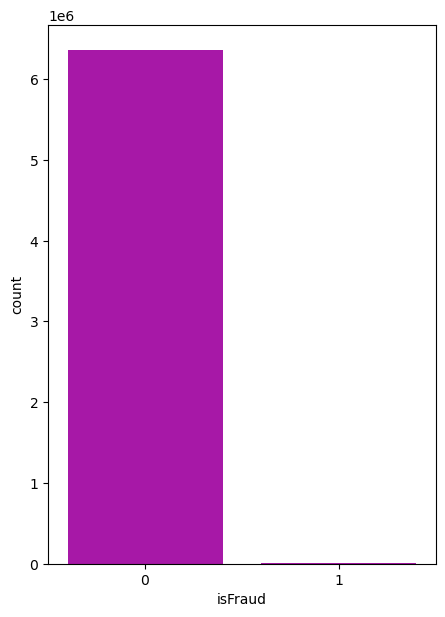

In [100]:
plt.figure(figsize=(5,7))                        #bar chart
sns.countplot(x="isFraud",color="m",data=df)

In [101]:
df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

<Axes: xlabel='isFlaggedFraud', ylabel='count'>

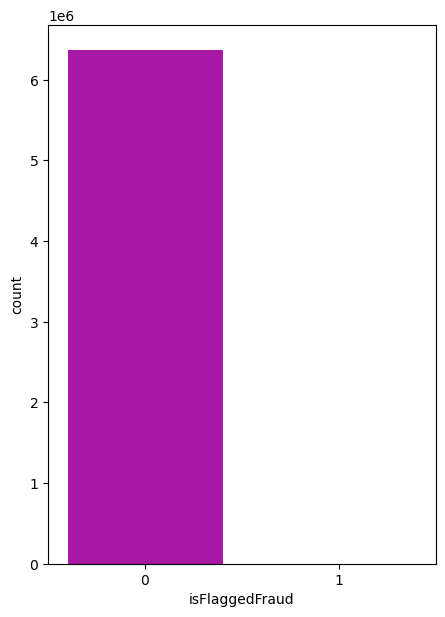

In [102]:
plt.figure(figsize=(5,7))                        #bar chart
sns.countplot(x="isFlaggedFraud",color="m",data=df)

In [103]:
df["type"].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

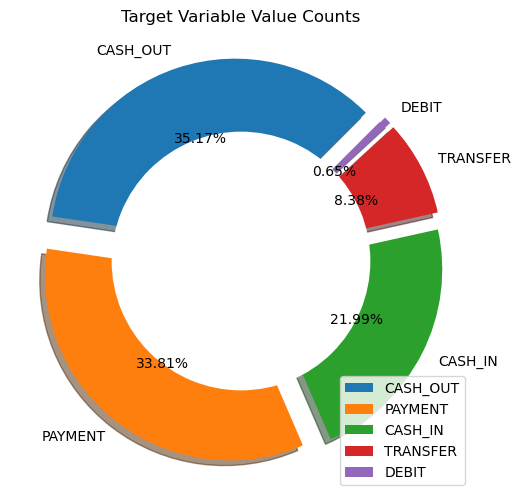

In [104]:
ex=[0.1,0.1,0.1,0.1,0.1]
plt.figure(figsize = (6, 6))                     #Pie chart
plt.pie(x = df['type'].value_counts(),\
        labels = ['CASH_OUT', 'PAYMENT','CASH_IN','TRANSFER','DEBIT'],\
        shadow = True,\
        explode=ex,\
        #colors = ['crimson', 'steelblue'],\
        autopct = '%0.2f%%',\
        startangle = 45)
plt.pie([1],radius=.7,colors='w')
plt.title('Target Variable Value Counts')
plt.legend()
plt.show()

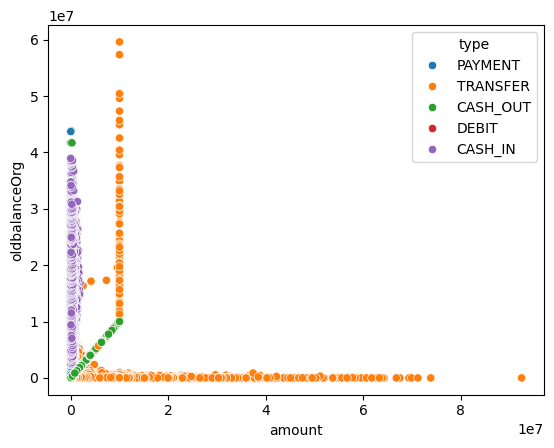

In [110]:
sns.scatterplot(x="amount",y="oldbalanceOrg",data=df,hue="type")
plt.show()

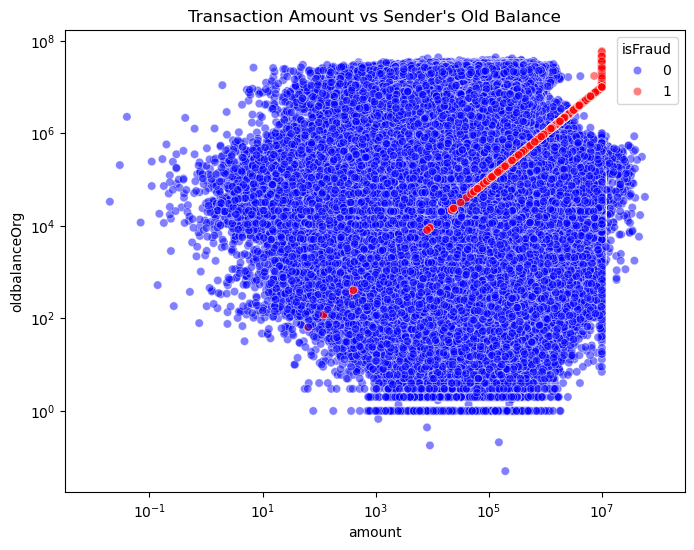

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(
    x='amount',
    y='oldbalanceOrg',
    hue='isFraud',
    data=df,
    alpha=0.5,
    palette={0:'blue', 1:'red'}
)
plt.xscale('log')  # optional if amounts vary a lot
plt.yscale('log')  # optional
plt.title("Transaction Amount vs Sender's Old Balance")
plt.show()


In [43]:
df.drop(['nameOrig', 'nameDest','step','isFlaggedFraud'], axis=1, inplace=True)
df.head(4)

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1


In [45]:
df["type"] = df["type"].map({"CASH_OUT": 1, "PAYMENT": 2, 
                                 "CASH_IN": 3, "TRANSFER": 4,
                                 "DEBIT": 5})
print(df.head())

   type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     2   9839.64       170136.0       160296.36             0.0   
1     2   1864.28        21249.0        19384.72             0.0   
2     4    181.00          181.0            0.00             0.0   
3     1    181.00          181.0            0.00         21182.0   
4     2  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFraud  
0             0.0        0  
1             0.0        0  
2             0.0        1  
3             0.0        1  
4             0.0        0  


In [47]:
corr = df.corr()
corr

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
type,1.000000,0.198987,0.260418,0.270669,0.066255,0.079111,0.016171
amount,0.198987,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,0.260418,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,0.270669,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.066255,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.079111,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.016171,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


In [49]:
x = df.drop(['isFraud'], axis=1)
y = df['isFraud']

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, shuffle=True)

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [55]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
model_d= DecisionTreeClassifier()
model_d.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

In [63]:
y_train_pred = model_d.predict(x_train_scaled)
y_test_pred =  model_d.predict(x_test_scaled)

In [65]:
acc = accuracy_score(y_test, y_test_pred)
acc*100

99.97370056150872

In [67]:
acc=accuracy_score(y_train,y_train_pred)
acc*100

100.0

In [69]:
# Metrics
print("Accuracy:", accuracy_score(y_test, y_test_pred)*100)
print("Precision:", precision_score(y_test, y_test_pred,average='weighted')*100)
print("Recall:", recall_score(y_test, y_test_pred,average='weighted')*100)
print("F1 Score:", f1_score(y_test, y_test_pred,average='weighted')*100)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

Accuracy: 99.97370056150872
Precision: 99.97360627229841
Recall: 99.97370056150872
F1 Score: 99.97365184062402
Confusion Matrix:
 [[1906109     242]
 [    260    2175]]


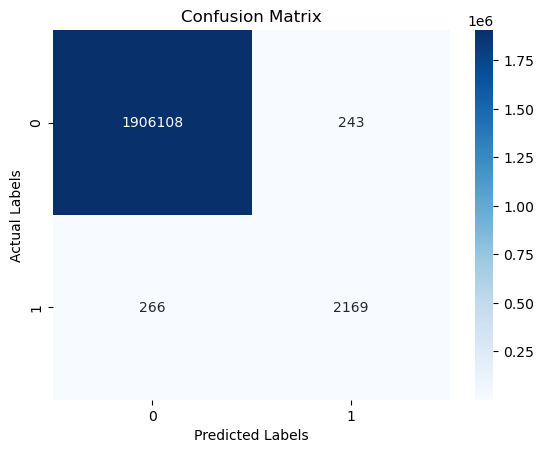

In [154]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure()
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

In [71]:
#Calculate common error metrics for a 2-class classifier

from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.90      0.89      0.90      2435

    accuracy                           1.00   1908786
   macro avg       0.95      0.95      0.95   1908786
weighted avg       1.00      1.00      1.00   1908786



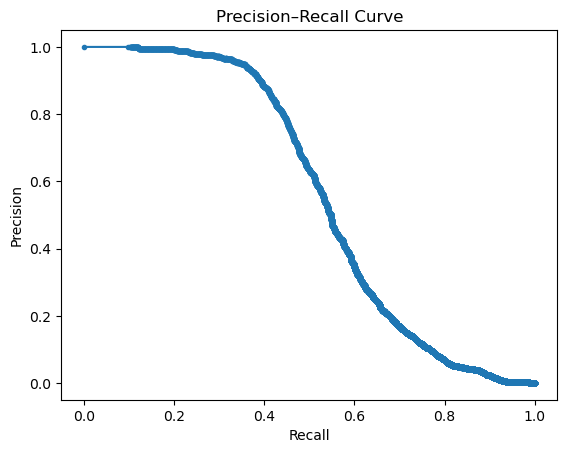

In [158]:
from sklearn.metrics import precision_recall_curve

y_proba = model.predict_proba(x_test_scaled)[:, 1]
precision, recall, _ = precision_recall_curve(y_test_pred, y_proba)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve')
plt.show()

In [162]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test_pred, y_proba)
print("ROC–AUC Score:", roc_auc*100)

ROC–AUC Score: 96.22355387863254


In [188]:
feature= np.array([[2,262343423,673654,3534,5434,1]])
print(model.predict(feature))

[0]


In [73]:
import pickle

In [75]:
pickle.dump(model_d, open('decision_model.pkl','wb'))

In [87]:
import pickle

# model = your trained model
with open('decision_model.pkl', 'wb') as f:
    pickle.dump(model_d, f)


In [91]:
import pickle

with open('decision_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [93]:
pickeld_file=pickle.load(open('decision_model.pkl','rb'))